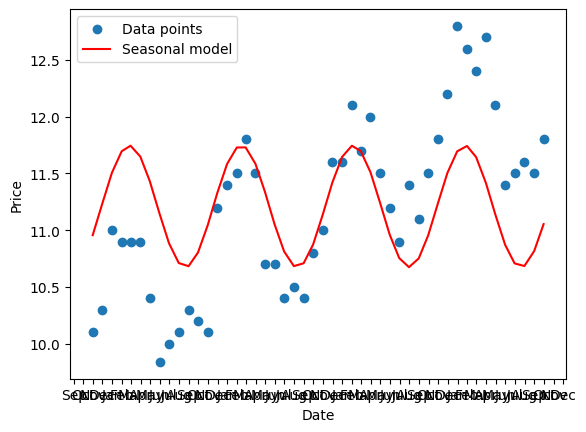

11.730806700863873


In [2]:
import csv
from scipy import optimize
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import matplotlib.dates as mdates

# File path
path = r'/workspaces/JPQuantForage/gas.csv'

# Initialize lists
dates = []
prices = []

# Read CSV file
with open(path, 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    for row in reader:
        dates.append(datetime.strptime(row[0], "%m/%d/%y"))  # Keep dates as datetime objects
        prices.append(float(row[1]))  # Convert prices to float

# Convert datetime objects to numeric format for fitting
numeric_dates = mdates.date2num(dates)

# Define the sinusoidal function
def seasonal_model(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

# Fit the sinusoidal model to the data
params, params_covariance = optimize.curve_fit(seasonal_model, numeric_dates, prices, p0=[1, 2*np.pi/(365.25), 0, np.mean(prices)])

# Plot data points and seasonal model
plt.scatter(dates, prices, label="Data points")
plt.plot(dates, seasonal_model(numeric_dates, *params), color='red', label="Seasonal model")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# Format x-axis to show months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.show()

#input_date = input("Enter a date (mm/dd/yy): ")
input_date = "12/31/24"

input_datetime = datetime.strptime(input_date, "%m/%d/%y")
input_numeric_date = mdates.date2num(input_datetime)
predicted_price = seasonal_model(input_numeric_date, *params)
print(predicted_price)
